In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import json


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#@ title Read ExifTool spreadsheet which has species common name
full_metadata = pd.read_csv(f'/content/drive/My Drive/FFI/MegaDetector Test/image_metadata(2020-06-26)_full.csv')
full_metadata.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,20,41,42,45,56,57,58,60,61,75) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SourceFile,BitsPerSample,Caption-Abstract,CatalogSets,Categories,CodedCharacterSet,ColorComponents,ColorLabel,Comment,CreateDate,CreatorTool,CurrentIPTCDigest,DateCreated,DateTime,DateTimeCreated,DateTimeOriginal,DateUTC,Description,Directory,EncodingProcess,Error,ExifByteOrder,ExifImageHeight,ExifImageWidth,ExifToolVersion,ExifVersion,FileAccessDate,FileCreateDate,FileModifyDate,FileName,FilePermissions,FileSize,FileType,FileTypeExtension,Flash,HierarchicalSubject,ImageDescription,ImageHeight,ImageNumber,ImageSize,ImageWidth,InstanceID,IPTCDigest,JFIFVersion,Keywords,LastKeywordIPTC,LastKeywordXMP,Make,Megapixels,MetadataDate,MIMEType,Model,ModificationDate,ModifyDate,Notes,OffsetSchema,Orientation,OriginatingProgram,Padding,PickLabel,ProcessingSoftware,ProgramVersion,Rating,RatingPercent,RegionInfoRegions,RegionList,ResolutionUnit,Software,Subject,TagsList,TimeCreated,Urgency,UserComment,Warning,XMPToolkit,XPKeywords,XResolution,YCbCrSubSampling,YResolution
0,D:/Fauna & Flora International/VietnamCameraSt...,8.0,NaN,"People|Setup, Observer|Tam","<Categories><Category Assigned=""0"">People<Cate...",UTF8,3.0,NaN,NaN,2019:04:22 15:09:11,NaN,0dfadea9315c091a67a43eb6881ea5df,NaN,NaN,NaN,2019:04:22 15:09:11,NaN,NaN,D:/Fauna & Flora International/VietnamCameraSt...,"Baseline DCT, Huffman coding",NaN,"Big-endian (Motorola, MM)",1536.0,2048.0,11.63,220.0,2020:05:26 10:18:20+07:00,2020:03:20 13:23:52+07:00,2020:05:07 10:40:30+07:00,100__67096__2019-04-22__15-09-11(1).JPG,rw-rw-rw-,458 kB,JPEG,jpg,Fired,"People|Setup, Observer|Tam",integtime=1535 A=88 D=128\r\n\rflashCrossover...,1536.0,1154.0,2048x1536,2048.0,NaN,NaN,1.02,"Setup, Tam",NaN,"People/Setup, Observer/Tam",Panthera V4,3.1,NaN,image/jpeg,CAM67096,NaN,2019:04:22 15:09:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,102717 V6-Bld1.15,"Setup, Tam","People/Setup, Observer/Tam",NaN,NaN,NaN,[minor] Unrecognized MakerNotes,XMP Core 4.4.0-Exiv2,NaN,1.0,YCbCr4:2:2 (2 1),1.0
1,D:/Fauna & Flora International/VietnamCameraSt...,8.0,NaN,"People|Setup, Observer|Tam","<Categories><Category Assigned=""0"">People<Cate...",UTF8,3.0,NaN,NaN,2019:04:22 15:09:42,NaN,0dfadea9315c091a67a43eb6881ea5df,NaN,NaN,NaN,2019:04:22 15:09:42,NaN,NaN,D:/Fauna & Flora International/VietnamCameraSt...,"Baseline DCT, Huffman coding",NaN,"Big-endian (Motorola, MM)",1536.0,2048.0,11.63,220.0,2020:06:24 14:00:28+07:00,2020:03:20 13:23:52+07:00,2020:05:07 10:40:30+07:00,100__67096__2019-04-22__15-09-42(2).JPG,rw-rw-rw-,471 kB,JPEG,jpg,Fired,"People|Setup, Observer|Tam",integtime=1535 A=88 D=128\r\n\rflashCrossover...,1536.0,1155.0,2048x1536,2048.0,NaN,NaN,1.02,"Setup, Tam",NaN,"People/Setup, Observer/Tam",Panthera V4,3.1,NaN,image/jpeg,CAM67096,NaN,2019:04:22 15:09:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,102717 V6-Bld1.15,"Setup, Tam","People/Setup, Observer/Tam",NaN,NaN,NaN,[minor] Unrecognized MakerNotes,XMP Core 4.4.0-Exiv2,NaN,1.0,YCbCr4:2:2 (2 1),1.0
2,D:/Fauna & Flora International/VietnamCameraSt...,8.0,NaN,"People|Setup, Observer|Tam","<Categories><Category Assigned=""0"">People<Cate...",UTF8,3.0,NaN,NaN,2019:04:22 15:12:32,NaN,0dfadea9315c091a67a43eb6881ea5df,NaN,NaN,NaN,2019:04:22 15:12:32,NaN,NaN,D:/Fauna & Flora International/VietnamCameraSt...,"Baseline DCT, Huffman coding",NaN,"Big-endian (Motorola, MM)",1536.0,2048.0,11.63,220.0,2020:06:24 14:00:29+07:00,2020:03:20 13:23:52+07:00,2020:05:07 10:40:30+07:00,100__67096__2019-04-22__15-12-32(1).JPG,rw-rw-rw-,485 kB,JPEG,jpg,Fired,"People|Setup, Observer|Tam",integtime=1535 A=88 D=128\r\n\rflashCrossover...,1536.0,1155.0,2048x1536,2048.0,NaN,NaN,1.02,"Setup, Tam",NaN,"People/Setup, Observer/Tam",Panthera V4,3.1,NaN,image/jpeg,CAM67096,NaN,2019:04:22 15:12:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,102717 V6-Bld1.15,"Setup, Tam","People/Setup, Observer/Tam",NaN,NaN,NaN,[minor] Unrecognized MakerNotes,XMP Core 4.4.0-Exiv2,NaN,1.0,YCbCr4:2:2 (2 1),1.0
3,D:/Fauna & Flora International/VietnamCameraSt...,8.0,NaN,"People|Se

In [4]:
#@ title Keep important columns
metadata = full_metadata[['FileName', 'CatalogSets']]

metadata.head()

,FileName,CatalogSets
0,100__67096__2019-04-22__15-09-11(1).JPG,"People|Setup, Observer|Tam"
1,100__67096__2019-04-22__15-09-42(2).JPG,"People|Setup, Observer|Tam"
2,100__67096__2019-04-22__15-12-32(1).JPG,"People|Setup, Observer|Tam"
3,100__67096__2019-04-22__15-12-55(2).JPG,"People|Setup, Observer|Tam"
4,100__67096__2019-04-22__15-13-18(1).JPG,"People|Setup, Observer|Tam"


In [5]:
#@ title Read MegaDetector result
# with open(f'/content/drive/My Drive/FFI/MegaDetector Test/MegaDetector_test_67096_output_file_name.json') as f:
with open(f'/content/drive/My Drive/FFI/MegaDetector Test/checkpoint_20210828135641.json') as f:
  mega_result = json.load(f)

# print(mega_result)

In [6]:
#@ title Split to species_common_name column

species_common_name = [] 

SPECIES_PREFIX = 'Species'
PEOPLE_PREFIX = 'People'

# Create certainty, species_common_name, observer, and people columns
catalog_sets = metadata['CatalogSets']
for i in range(len(catalog_sets)):
  if catalog_sets[i] is not np.NaN:
    catalog = str(catalog_sets[i]).split(', ')
    spe = ''
    for i in range(len(catalog)):
      if SPECIES_PREFIX in catalog[i]:
        if catalog[i].split('|')[1] != 'Human':
          if '(unknown)' in catalog[i].split('|')[1]:
            spe = spe + ', ' + catalog[i].split('|')[1].split('(unknown)')[0]
          else:
            spe = spe + ', ' + catalog[i].split('|')[1]
      if PEOPLE_PREFIX in catalog[i]:
        if not 'Human' in spe:
          spe = spe + ', ' + 'Human'
    species_common_name.append(spe[2:])

  else:
    species_common_name.append('')

metadata['species_common_name'] = species_common_name

col = metadata.columns.to_list()
col.remove('species_common_name')

metadata = metadata.set_index(col).apply(lambda x: x.str.split(',').explode()).reset_index()
metadata['species_common_name'] = metadata['species_common_name'].str.strip()

metadata.sample(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,FileName,CatalogSets,species_common_name
1887,100__68952__2019-06-29__09-18-11(3).JPG,NaN,
28717,238__69217__2019-07-22__16-08-52(3).JPG,NaN,
30595,kpc239__ct69010__2019-10-31__16-02-34(2)__Blan...,Observer|An Nguyen,
81035,kpc369__ct68974__2019-10-09__10-27-09(2)__Unid...,"Species|Animal (unknown), Observer|An Nguyen",Animal
105968,79__66961__2019-06-28__08-06-52(2).JPG,NaN,
29460,kpc239__ct68975__2019-11-15__21-58-58(6)__Blan...,Observer|An Nguyen,
80195,kpc368__ct68876__2019-11-18__10-58-43(6)__Blan...,Observer|An Nguyen,
35125,243__67027__2019-11-10__09-38-29(2).JPG,Observer|Tam,
60201,kpc314__ct68908__2019-11-08__07-37-42(2)__Oran...,"Observer|An Nguyen, Species|Orange-headed Thrush",Orange-headed Thrush
47726,kpc277__ct69227__2019-11-08__08-25-24(1)__Oran...,"Observer|An Nguyen, Species|Orange-headed Thrush",Orange-headed Thrush


In [7]:
len(metadata[metadata['species_common_name'] == ''])/len(metadata)

0.7518174731231531

In [8]:
for i in range(5):
  print(mega_result['images'][i])

{'file': '/content/drive/My Drive/Camera Trap Data/Kon Plong/2019-2020 Survey/Processed images/Final/100/67096/100__67096__2019-04-27__12-50-24(2).JPG', 'max_detection_conf': 0.922, 'detections': [{'category': '1', 'conf': 0.922, 'bbox': [0.5833, 0.9097, 0.4083, 0.09005]}]}
{'file': '/content/drive/My Drive/Camera Trap Data/Kon Plong/2019-2020 Survey/Processed images/Final/100/67096/100__67096__2019-04-24__09-55-44(1).JPG', 'max_detection_conf': 0.681, 'detections': [{'category': '1', 'conf': 0.681, 'bbox': [0.5914, 0.9117, 0.3952, 0.08826]}, {'category': '1', 'conf': 0.126, 'bbox': [0.7356, 0.917, 0.2506, 0.08295]}]}
{'file': '/content/drive/My Drive/Camera Trap Data/Kon Plong/2019-2020 Survey/Processed images/Final/100/67096/100__67096__2019-04-22__15-14-47(2).JPG', 'max_detection_conf': 0.999, 'detections': [{'category': '2', 'conf': 0.999, 'bbox': [0.01608, 0.04712, 0.7686, 0.9528]}, {'category': '2', 'conf': 0.288, 'bbox': [0.004918, 0.3709, 0.3315, 0.6175]}, {'category': '2', 'co

In [9]:
def has_object(detections, threshold, category_id):
  for i in range(len(detections)):
    if detections[i]['conf'] > threshold and detections[i]['category'] == category_id:
      return True
  return False


THRESHOLD = 0.5

category = {
    '1': 'Animal',
    '2': 'Human',
    '3': 'Vehicle'
}

y_actu = []
y_pred = []

for i in range(len(mega_result['images'])):
  try:
    # actual label
    actu = metadata[metadata['FileName'] == files[i]]['species_common_name'].iat[0]

    # prediction label
    # if the image has any animal
    if has_object(mega_result['images'][i]['detections'], THRESHOLD, '1'):
      if actu == '':
        y_pred.append('Animal')
        y_actu.append('Blank')
      else:
        y_pred.append('Animal')
        y_actu.append(actu)

    # if the image has any human
    if has_object(mega_result['images'][i]['detections'], THRESHOLD, '2'):
      y_pred.append('Human')
      if actu == '':
        y_actu.append('Blank')
      else:
        y_actu.append(actu)

    # if not have any human or animal
    if (not has_object(mega_result['images'][i]['detections'], THRESHOLD, '1')) and (not has_object(mega_result['images'][i]['detections'], THRESHOLD, '2')):
      y_pred.append('Blank')
      if actu == '':
        y_actu.append('Blank')
      else:
        y_actu.append(actu)    
  except:
    # print('File not found', files[i])
    pass

  # if actu == '':
  #   y_actu.append('Blank')
  # else:
  #   y_actu.append(actu)

  # if mega_result['images'][i]['max_detection_conf'] < THRESHOLD:
  # else:
  #   for j in range(len(mega_result['images'][i]['detections'])):
  #     detection = mega_result['images'][i]['detections'][j]
  #     if detection['conf'] > THRESHOLD:
  #       cat = category[detection['category']]

  #   if cat == 'Vehicle':
  #     y_pred.append('Blank')
  #   elif cat == 'Human':
  #     y_pred.append(cat)
  #   else:
  #     if actu == '':
  #       y_pred.append('Animal')
  #     else:
  #       y_pred.append('Animal')



In [10]:
def list_labels(mega_result, metadata, THRESHOLD):
  def has_object(detections, threshold, category_id):
    for i in range(len(detections)):
      if detections[i]['conf'] > threshold and detections[i]['category'] == category_id:
        return True
    return False

  # list of files
  files = []
  for i in range(len(mega_result['images'])):
    files.append(mega_result['images'][i]['file'].split('/')[-1])
  print(len(mega_result['images']), "images")
  # print((files))

  category = {
      '1': 'Animal',
      '2': 'Human',
      '3': 'Vehicle'
  }

  y_actu = []
  y_pred = []

  for i in range(len(mega_result['images'])):
    try:
      # actual label
      actu = metadata[metadata['FileName'] == files[i]]['species_common_name'].iat[0]

      # prediction label
      # if the image has any animal
      if has_object(mega_result['images'][i]['detections'], THRESHOLD, '1'):
        if actu == '':
          y_pred.append('Animal')
          y_actu.append('Blank')
        else:
          y_pred.append('Animal')
          y_actu.append(actu)

      # if the image has any human
      if has_object(mega_result['images'][i]['detections'], THRESHOLD, '2'):
        y_pred.append('Human')
        if actu == '':
          y_actu.append('Blank')
        else:
          y_actu.append(actu)

      # if not have any human or animal
      if (not has_object(mega_result['images'][i]['detections'], THRESHOLD, '1')) and (not has_object(mega_result['images'][i]['detections'], THRESHOLD, '2')):
        y_pred.append('Blank')
        if actu == '':
          y_actu.append('Blank')
        else:
          y_actu.append(actu)    
    except:
      # print('File not found', files[i])
      pass
  
  y_ac = np.array(y_actu)

  return y_actu, y_pred, len(files), len(y_ac[y_ac == 'Blank']) / len(y_ac)


In [11]:
def create_confusion_matrix(y_actu, y_pred, num_files):
  n_samples = num_files
  print("n_samples: %d" % n_samples)
  print('Confusion matrix')

  y_actu = pd.Series(y_actu, name='Actual')
  y_pred = pd.Series(y_pred, name='Prediction')
  df_confusion = pd.crosstab(y_pred, y_actu, rownames=['Prediction'], colnames=['Actual'], margins=True)

  # normalized confusion matrix using:
  df_conf_norm = round(df_confusion / df_confusion.sum(axis=1), 2)

  # delete nan columns
  df_conf_norm.dropna(axis = 1, inplace=True)

  # drop unecessary columns
  df_conf_norm.drop(columns=['All'], inplace=True)

  # collapse columns
  confusion_matrix = pd.DataFrame(index = ['Animal', 'Human', 'Blank', 'Total', 'Recall'])
  for col in df_confusion.columns:
    all = df_confusion[col]['All']
    animal = all - df_confusion[col]['Blank'] - df_confusion[col]['Human']
    human = df_confusion[col]['Human']
    blank = df_confusion[col]['Blank']
    total = animal + human + blank
    recall = 0
    # recall
    if col == 'Human':
      recall = human / total
    elif col == 'Blank':
      recall = blank / total
    else:
      recall = animal / total
    confusion_matrix[col] = [str(animal), str(human), str(blank), str(total), str(round(recall,2))]

  return confusion_matrix

In [12]:
def visualize_recall_bargraph(confusion_matrix, mega_result, THRESHOLD, reduction_rate):
  total = []
  recall = []

  image_count = len(mega_result['images'])

  data = confusion_matrix

  for species in data.columns[:-1]: # not include All 
      recall.append(data[species][4])
      total.append(data[species][3])

  recall_stats = pd.DataFrame({'name':data.columns[:-1], 'recall':recall, 'total':total})
  recall_stats['recall'] = recall_stats['recall'].astype('float64')
  recall_stats['total'] = recall_stats['total'].astype('int')
  recall_stats.sort_values('recall', inplace=True, ascending=True)

  # creating the bar plot
  species_name = recall_stats['name'].to_list()
  values = recall_stats['recall'].to_list()
  total = recall_stats['total'].to_list()
  avg_recall = np.mean(recall_stats['recall'])

  fig = plt.figure(figsize=(10, 20))
    
  plt.barh(species_name, values, color='maroon')
  for i, v in enumerate(values):
      plt.text(v, i, str(round(v,2)), color='blue', fontweight='bold')
      plt.text(v+0.07, i, f'{str(total[i])} images', color='blue', fontweight='bold')
  # for i, v in enumerate(total):

  plt.xlabel("Values")
  plt.ylabel("Species name")
  plt.title(f"Evaluate over {image_count} images, threshold={THRESHOLD}, average_recall_value={round(avg_recall,2)}, reduction_rate={reduction_rate}")
  # plt.savefig(f"123.png")
  plt.show()


In [13]:
# @interact(THRESHOLD=(0, 100))
def recall_value_by_threshold(THRESHOLD):
  THRESHOLD = THRESHOLD / 100
  y_actu, y_pred, num_files, reduction_rate = list_labels(mega_result, metadata, THRESHOLD)
  confusion_matrix = create_confusion_matrix(y_actu, y_pred, num_files)
  visualize_recall_bargraph(confusion_matrix, mega_result, THRESHOLD, reduction_rate)

23340 images
n_samples: 23340
Confusion matrix


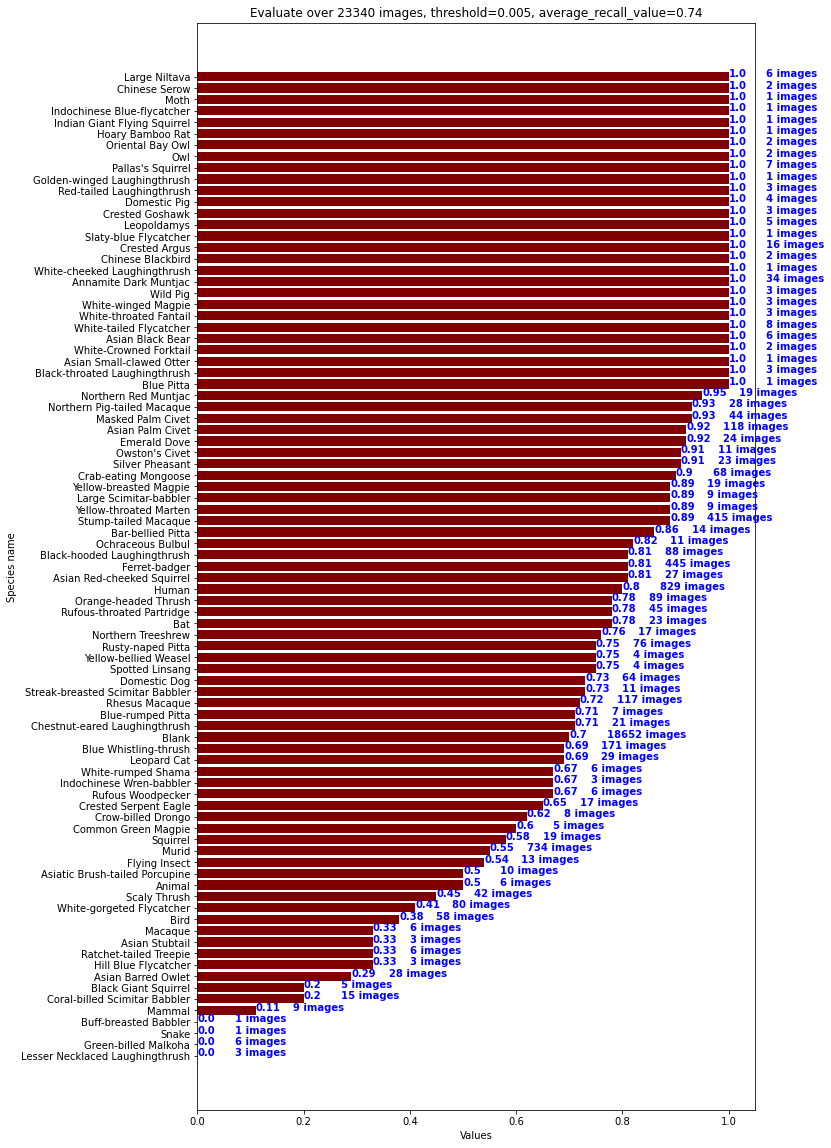

In [14]:
recall_value_by_threshold(0.5)